# DIABETES PREDICTION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.describe() # in this we can see min data for some important columns are zero so
# we will put mean instead of that empty data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# replacing zero values with mean
# pregnancy can be zero
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

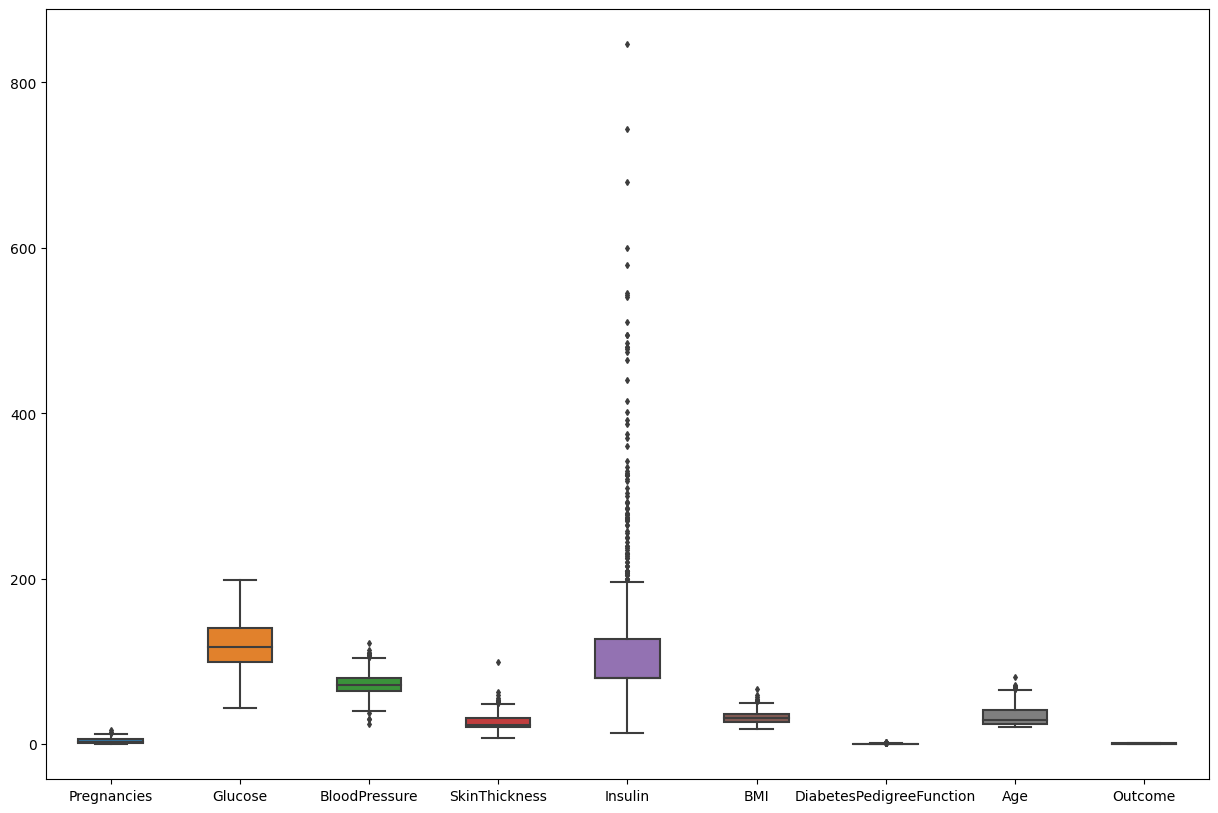

In [ ]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data,width = 0.5,ax=ax,fliersize = 3)
# fliersize are size of the markers used to indicate outlier observation
# in insulin there are so many outliers so we ca fix them
# either using standardistion

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
# making dependent and independent variables
x = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

((576, 8), (192, 8))

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled,x_test_scaled

(array([[ 2.80346794,  0.24258793, -0.25110513, ...,  1.10366684,
          0.29608546,  0.96352088],
        [ 0.07832678,  0.24258793,  1.14476384, ...,  0.40523314,
         -0.70087555, -0.86295593],
        [-0.22446668, -2.01997244,  0.81427371, ...,  0.30337823,
         -0.66548048,  1.13747105],
        ...,
        [ 1.89508755, -0.68905457,  1.14476384, ...,  1.93305686,
          1.96850229,  0.44167036],
        [-1.13284707,  0.64186329, -0.25110513, ...,  1.46743439,
         -0.77756486, -0.34110542],
        [-1.13284707,  0.10949615,  1.97098917, ..., -1.42815531,
         -0.6094383 , -1.03690611]]),
 array([[ 0.6839137 , -0.78887341, -1.16866709, ...,  0.24517542,
         -0.11390738,  0.87654579],
        [-0.52726014, -0.32305216,  0.23591598, ...,  0.49253736,
         -0.94569142, -1.03690611],
        [-0.52726014, -0.45614395, -0.67293189, ..., -0.22044704,
         -0.91619553, -1.03690611],
        ...,
        [ 0.6839137 ,  0.04295025, -0.01195162, ...,  

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x_test_scaled)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
log_reg.predict_proba(x_test_scaled)

array([[0.74784432, 0.25215568],
       [0.82246777, 0.17753223],
       [0.89266197, 0.10733803],
       [0.86652787, 0.13347213],
       [0.52205086, 0.47794914],
       [0.5787055 , 0.4212945 ],
       [0.98821506, 0.01178494],
       [0.62132949, 0.37867051],
       [0.40472276, 0.59527724],
       [0.21431414, 0.78568586],
       [0.77365079, 0.22634921],
       [0.08423005, 0.91576995],
       [0.60809566, 0.39190434],
       [0.74931586, 0.25068414],
       [0.93356837, 0.06643163],
       [0.62474747, 0.37525253],
       [0.88991859, 0.11008141],
       [0.93500136, 0.06499864],
       [0.22888094, 0.77111906],
       [0.39779681, 0.60220319],
       [0.81584832, 0.18415168],
       [0.93141573, 0.06858427],
       [0.49513651, 0.50486349],
       [0.91107608, 0.08892392],
       [0.43881334, 0.56118666],
       [0.09139923, 0.90860077],
       [0.89248146, 0.10751854],
       [0.97223695, 0.02776305],
       [0.73795269, 0.26204731],
       [0.90436493, 0.09563507],
       [0.

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[99 27]
 [24 42]]
0.734375
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       126
           1       0.61      0.64      0.62        66

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.73      0.74       192



In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
parameters = {'penalty':['l1','l2'],
              'C':np.logspace(-3,3,7),
              'solver':['newton-cg','lbfgs','liblinear'],}

In [ ]:
logreg = LogisticRegression()

In [ ]:
clf  = GridSearchCV(logreg,param_grid = parameters,scoring = 'accuracy',cv = 10)
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
clf.best_score_

0.7759225650332727

In [ ]:
y_pred = clf.predict(x_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[99, 24],
       [28, 41]])

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
true_negative = conf_mat[1][1]
false_negative = conf_mat[1][0]

In [ ]:
accuracy = (true_positive+true_negative)/(true_negative+true_positive+false_positive+false_negative)
accuracy

0.7291666666666666

In [ ]:
precision = (true_positive)/(true_positive+false_positive)
precision

0.7795275590551181

In [ ]:
recall = (true_positive)/(true_positive+false_negative)
recall

0.8048780487804879

In [ ]:
f1_score = 2*(recall*precision)/(recall+precision)
f1_score

0.792

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(log_reg,open('log_reg.pkl','wb'))